**2021 Lindoscope workshop**


<p align='center'><img src='https://github.com/TeamPrigge/widgets/blob/main/Lindoscope_Logo.png?raw=True'/></p>
<p align='center'><img src='https://github.com/TeamPrigge/widgets/blob/main/Lindoscope.png?raw=True' width="480" height="240"/></p>


### Pupilometry
Here in this jupyter you will visualize the data you aquired during pupilometry experiment.
As a coding practice for this session you also will practice writing some functions to analyze some of the figures.




In [380]:
# @title Install dependencies
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from scipy.ndimage import gaussian_filter1d
from ipywidgets import *
from scipy.optimize import curve_fit


### Writing a function

<p align='center'><img src='https://github.com/TeamPrigge/widgets/blob/main/python-function.svg?raw=True'/></p>

The function definition opens with the keyword def followed by the name of the function (fahr_to_celsius) and a parenthesized list of parameter names (temp). The body of the function — the statements that are executed when it runs — is indented below the definition line. The body concludes with a return keyword followed by the return value.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a return statement to send a result back to whoever asked for it.

Let’s try running our function.


In [381]:
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))

In [382]:
fahr_to_celsius(32)

0.0

### Import the data from the local directory
Go to the file containg the excel trained data and paste the directory in the path

In [397]:
######### Importing the data
path = r'C:\Users\shossein\Desktop\LINdoscope_Pupile'

######################### Training Data
all_trainingR = glob.glob(path + "/right.csv")
frame_trainingR = pd.read_csv(all_trainingR[0], index_col=None, header=2)

all_trainingL = glob.glob(path + "/left.csv")
frame_trainingL = pd.read_csv(all_trainingL[0], index_col=None, header=2)

# all_training = glob.glob(path + "/*.csv")

# li = []

# for filename in all_training:
#     df_training = pd.read_csv(filename, index_col=None, header=2)
#     li.append(df_training)

# frame_training = pd.concat(li, axis=0, ignore_index=True)
# frame_training
######################### Camera & laser analogue
all_analogue = glob.glob(path + "/*.xlsx")

ii = []

for filename in all_analogue:
    df_analogue = pd.read_excel(filename,  sheet_name = 1, header=0)
    ii.append(df_analogue)

frame_analogue = pd.concat(ii, axis=1, ignore_index=False)
# frame_analogue

In [398]:
frame_trainingR

,coords,x,y,likelihood,x.1,y.1,likelihood.1,x.2,y.2,likelihood.2,x.3,y.3,likelihood.3
0,0,51.539436,50.458736,1.0,70.985924,68.854515,1.0,54.901432,67.441025,1,71.606117,52.700699,1.0
1,1,51.676701,50.458736,1.0,71.209717,68.902336,1.0,55.033825,67.860214,1,71.606117,52.700699,1.0
2,2,51.693649,50.508247,1.0,71.640778,68.902336,1.0,55.046814,67.926384,1,71.696617,52.826401,1.0
3,3,52.294704,50.544144,1.0,71.659767,68.925812,1.0,55.859158,68.090508,1,71.696617,52.826401,1.0
4,4,52.340118,50.961292,1.0,71.950325,68.902336,1.0,56.188580,68.301399,1,71.696617,52.869705,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,12595,53.911865,48.581707,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.579956,46.727303,1.0
12596,12596,53.911865,48.614117,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.474403,46.671974,1.0
12597,12597,53.911865,48.614117,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.474403,46.671974,1.0
12598,12598,53.790089,48.614117,1.0,77.553185,70.764114,1.0,54.299030,70.568237,1,78.428055,46.671974,1.0


### Preprocess the data
To clean the data we have to first get rid of small liklihood

In [399]:
############   preprocessing the data

threshold = 0.7 # to accept the coordinate

training_filteredR = frame_trainingR[(frame_trainingR["likelihood"] >= threshold) # Filtering all concatenated training data
         &  (frame_trainingR["likelihood.1"] >= threshold)
         &  (frame_trainingR["likelihood.2"] >= threshold)
         &  (frame_trainingR["likelihood.3"] >= threshold)] # filtered dataframe

training_filteredL = frame_trainingL[(frame_trainingL["likelihood"] >= threshold) # Filtering all concatenated training data
         &  (frame_trainingL["likelihood.1"] >= threshold)
         &  (frame_trainingL["likelihood.2"] >= threshold)
         &  (frame_trainingL["likelihood.3"] >= threshold)] # filtered dataframe

In [400]:
training_filteredR

,coords,x,y,likelihood,x.1,y.1,likelihood.1,x.2,y.2,likelihood.2,x.3,y.3,likelihood.3
0,0,51.539436,50.458736,1.0,70.985924,68.854515,1.0,54.901432,67.441025,1,71.606117,52.700699,1.0
1,1,51.676701,50.458736,1.0,71.209717,68.902336,1.0,55.033825,67.860214,1,71.606117,52.700699,1.0
2,2,51.693649,50.508247,1.0,71.640778,68.902336,1.0,55.046814,67.926384,1,71.696617,52.826401,1.0
3,3,52.294704,50.544144,1.0,71.659767,68.925812,1.0,55.859158,68.090508,1,71.696617,52.826401,1.0
4,4,52.340118,50.961292,1.0,71.950325,68.902336,1.0,56.188580,68.301399,1,71.696617,52.869705,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,12595,53.911865,48.581707,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.579956,46.727303,1.0
12596,12596,53.911865,48.614117,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.474403,46.671974,1.0
12597,12597,53.911865,48.614117,1.0,77.666649,70.764114,1.0,54.331257,70.568237,1,78.474403,46.671974,1.0
12598,12598,53.790089,48.614117,1.0,77.553185,70.764114,1.0,54.299030,70.568237,1,78.428055,46.671974,1.0


### Calculating the Eucleadian Distance
In mathematics, the Euclidean distance between two points in Euclidean space is the length of a line segment between the two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem, 
therefore occasionally being called the Pythagorean distance

$$Eucleadian Distance (d) = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$$


<!-- <p align='center'><img src='https://github.com/TeamPrigge/widgets/blob/main/Euclidean-distance.png?raw=True'/></p> -->






In [371]:
# EXERCISE_3: Difine a function for Eucleadian Distance
#################################################
## a function
raise NotImplementedError("Calculate the Eucleadian Distance")
#################################################
# Hint: You can call your function : "calculateDistance"
...


[*Click for solution*](https://github.com/TeamPrigge/Lindoscope/blob/main/Excercise_3.py)



In [401]:
result_right_leftR = []
result_top_bottomR = []
result_right_leftL = []
result_top_bottomL = []
for i in range (len(training_filteredR["x.1"])):
    x=training_filteredR["x"][i]    #top
    y=training_filteredR["y"][i]    #top
    x1=training_filteredR["x.1"][i] #bottom
    y1=training_filteredR["y.2"][i]  #bottom
    top_bottom = calculateDistance(x,y,x1,y1)
    result_top_bottomR.append(top_bottom)

    x2=training_filteredR["x.2"][i]    #left
    y2=training_filteredR["y.2"][i]    #left
    x3=training_filteredR["x.3"][i]   #right
    y3=training_filteredR["y.3"][i]   #right
    right_left = calculateDistance(x2,y2,x3,y3)
    result_right_leftR.append(right_left)
    
for i in range (len(training_filteredL["x.1"])):
    x=training_filteredL["x"][i]    #top
    y=training_filteredL["y"][i]    #top
    x1=training_filteredL["x.1"][i] #bottom
    y1=training_filteredL["y.2"][i]  #bottom
    top_bottom = calculateDistance(x,y,x1,y1)
    result_top_bottomL.append(top_bottom)

    x2=training_filteredL["x.2"][i]    #left
    y2=training_filteredL["y.2"][i]    #left
    x3=training_filteredL["x.3"][i]   #right
    y3=training_filteredL["y.3"][i]   #right
    right_left = calculateDistance(x2,y2,x3,y3)
    result_right_leftL.append(right_left)
    

### Getting the number of TTL applied
we set a threshold to calculate the number of TTL----> there are approximately 5 to 6 data points for each TTL

In [388]:
# # plt.plot(frame_analogue.iloc[2420:2450,4])

# for local maxima to find the peaks of camera fps
stack = np.array(frame_analogue.iloc[:,4]) # column for camera
prev = stack[0]
thresh = 4 # threshold to detect the peak
peaks = []

for num, i in enumerate(stack[1:], 1):
    if i> thresh:
        peaks.append(num)
    prev = i 

print(np.size(peaks))
print(np.size(peaks)/5) # approximate number of TTL 


62987
12597.4


### Plotting some figures
Now we plot the Pupil diameter and compare that to the stimulation paradigme

<IPython.core.display.Javascript object>


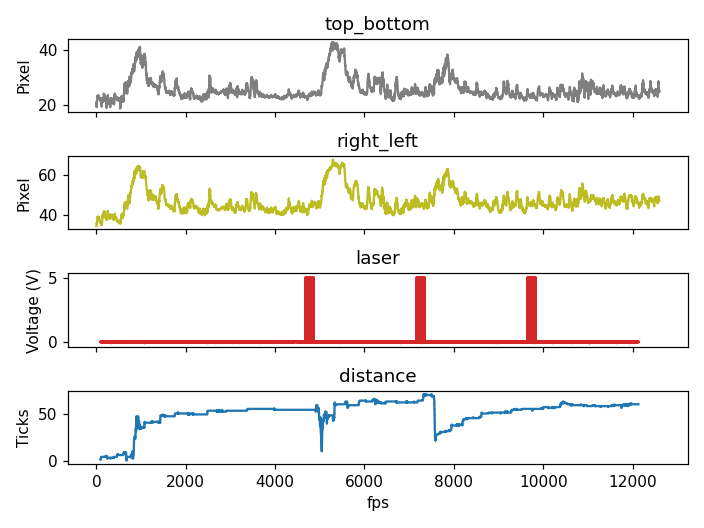

interactive(children=(FloatSlider(value=1.0, description='wL', max=3.0, min=-1.0), Output()), _dom_classes=('w…

<IPython.core.display.Javascript object>


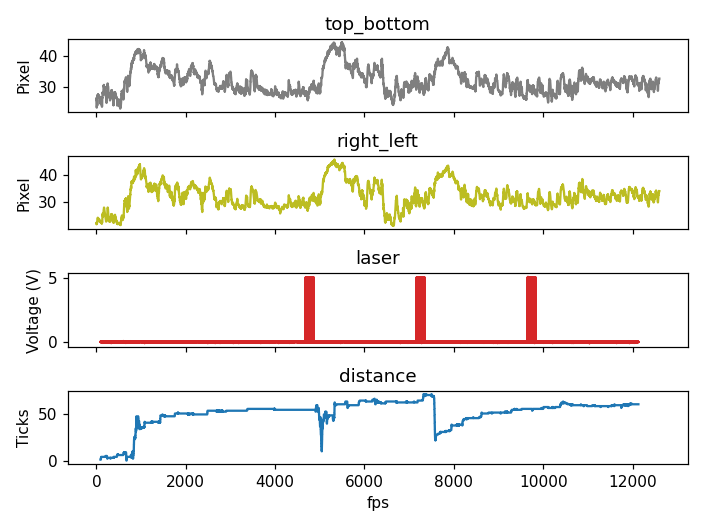

interactive(children=(FloatSlider(value=1.0, description='wR', max=3.0, min=-1.0), Output()), _dom_classes=('w…

In [431]:
%matplotlib notebook


fig, ax = plt.subplots(4, sharex=True)
######################################################  Left Pupil
##### Plotting the top_bottom distance
x_TD_Left = np.arange(0, np.size(result_top_bottomL), 1)
y_TD_Left = result_top_bottomL
line_TD, = ax[0].plot(x_TD_Left, y_TD_Left, 'tab:gray' )
ax[0].set_title('top_bottom') 
ax[0].set_ylabel('Pixel') 

##### Plotting the right_left distance
x_RL_Left = np.arange(0, np.size(result_right_leftL), 1)
y_RL_Left = result_right_leftL
line_RL, = ax[1].plot(x_RL_Left, y_RL_Left, 'tab:olive' )
ax[1].set_title('right_left') 
ax[1].set_ylabel('Pixel') 

##### Plotting the laser stimulation
sampleF = 26.16888888888889         ## Sampling frequency of laser signal
x_laser=frame_analogue.iloc[peaks[0]:peaks[-1],1].index.values/sampleF
y_laser=frame_analogue.iloc[peaks[0]:peaks[-1],1]
line_laser, = ax[2].plot(x_laser, y_laser, 'tab:red')
ax[2].set_title('laser') 
ax[2].set_ylabel('Voltage (V)')


##### Plotting the speed
x_speed = frame_analogue.iloc[peaks[0]:peaks[-1],6].index.values/sampleF
y_speed = frame_analogue.iloc[peaks[0]:peaks[-1],6] # column for spead signal
line_speed, = ax[3].plot(x_speed, y_speed, 'tab:blue' )
ax[3].set_title('distance') 
ax[3].set_ylabel('Ticks') 
ax[3].set_xlabel('fps')

def update(wL = 1.0):
    line_TD.set_xdata(wL * x_TD_Left)
    line_RL.set_xdata(wL * x_RL_Left)
    line_laser.set_xdata(wL * x_laser)
    line_speed.set_xdata(wL * x_speed)
    fig.canvas.draw_idle()

interact(update);
fig.tight_layout()

######################################################  Right Pupil
fig, ax = plt.subplots(4, sharex=True)
##### Plotting the top_bottom distance
x_TD_Right = np.arange(0, np.size(result_top_bottomR), 1)
y_TD_Right = result_top_bottomR
line_TD, = ax[0].plot(x_TD_Right, y_TD_Right, 'tab:gray' )
ax[0].set_title('top_bottom') 
ax[0].set_ylabel('Pixel') 

##### Plotting the right_left distance
x_RL_Right = np.arange(0, np.size(result_right_leftR), 1)
y_RL_Right = result_right_leftR
line_RL, = ax[1].plot(x_RL_Right, y_RL_Right, 'tab:olive' )
ax[1].set_title('right_left') 
ax[1].set_ylabel('Pixel') 

##### Plotting the laser stimulation
sampleF = 26.16888888888889         ## Sampling frequency of laser signal
x_laser=frame_analogue.iloc[peaks[0]:peaks[-1],1].index.values/sampleF
y_laser=frame_analogue.iloc[peaks[0]:peaks[-1],1]
line_laser, = ax[2].plot(x_laser, y_laser, 'tab:red')
ax[2].set_title('laser') 
ax[2].set_ylabel('Voltage (V)')


##### Plotting the speed
x_speed = frame_analogue.iloc[peaks[0]:peaks[-1],6].index.values/sampleF
y_speed = frame_analogue.iloc[peaks[0]:peaks[-1],6] # column for spead signal
line_speed, = ax[3].plot(x_speed, y_speed, 'tab:blue' )
ax[3].set_title('distance') 
ax[3].set_ylabel('Ticks') 
ax[3].set_xlabel('fps')

def update(wR = 1.0):
    line_TD.set_xdata(wR * x_TD_Right)
    line_RL.set_xdata(wR * x_RL_Right)
    line_laser.set_xdata(wR * x_laser)
    line_speed.set_xdata(wR * x_speed)
    fig.canvas.draw_idle()

interact(update);
fig.tight_layout()



In [375]:
# for local maxima to find the peaks of camera fps
stackk = np.array(frame_analogue.iloc[round(start*sampleF):round(end*sampleF),1]) # column for camera
prevv = stackk[0]
threshh = 4 # threshold to detect the peak
TTL_NO = []

for num, i in enumerate(stackk[1:], 1):
    if i> threshh:
        TTL_NO.append(num)
    prevv = i 

print(np.size(TTL_NO))
print(np.size(TTL_NO)/5) # approximate number of TTL 


80
16.0


## Inflection points
There are many possible answers:

One idea would be to smooth the data by taking moving averages or splines or something and then take the **second 
derivative** and look for when it changes sign. This would find approximate "inflection points" or "turning points" -- 
literally, it would find when the concavity changes.

Plot of $$f(x) = \sin(2*x)$$ 
from 
−π/4 to 5π/4; 
the second derivative is 
$$f″(x) = –4*sin(2*x)$$

its sign is thus the opposite of the sign of f. Tangent is blue where the curve is convex (above its own tangent), green where concave (below its tangent), and red at inflection points: 0, π/2 and π
<p align='center'><img src='https://github.com/TeamPrigge/widgets/blob/main/Animated_illustration_of_inflection_point.gif?raw=True'/></p>


In [376]:
# EXERCISE_4: Calculate inflection point
#################################################
## a function
raise NotImplementedError("Calculate inflection point")
#################################################
# Hint: You can call your function : "InflectionPoints"
#         use ""gaussian_filter1d"" for smoothing chose the window as 900
#         use ""np.gradient"" for second derivative
#         use ""np.where(np.diff(np.sign(x)))[0]"" to find the turning points
...


[*Click for solution*](https://github.com/TeamPrigge/Lindoscope/blob/main/Excercise_4.py)

<IPython.core.display.Javascript object>


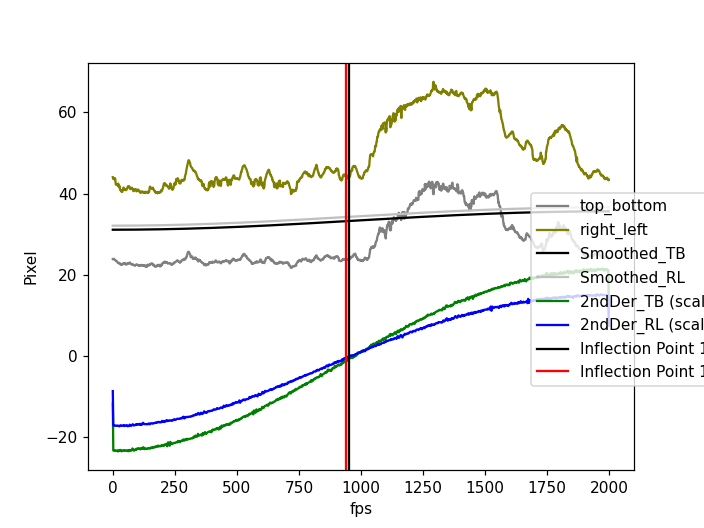

top_bottom delay: 84.16270380434787
right_left delay: 75.16270380434787


<IPython.core.display.Javascript object>


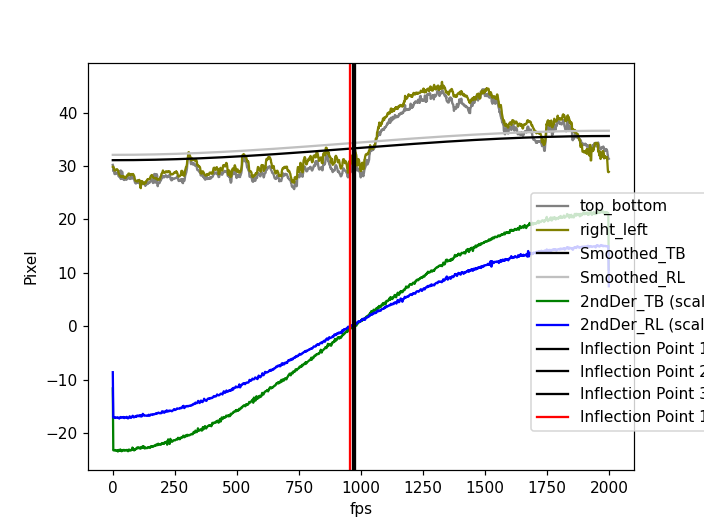

top_bottom delay: 105.8293704710145
right_left delay: 88.16270380434787
The difference of response between Left and Right Pupil in (ms) 0.54375


In [430]:
# Define zooming window
start = 4000 # 
end = 6000#

######################################################  lEFT Pupil
# find Inflection points
infls_TB = InflectionPoints(result_top_bottomL[start:end])
infls_RL = InflectionPoints(result_right_leftL[start:end])

# plot results
plt.figure()
plt.plot(result_top_bottomL[start:end], label='top_bottom', color = 'gray')
plt.plot(result_right_leftL[start:end], label='right_left', color = 'olive')

plt.plot(smooth_TB, label='Smoothed_TB', color = 'k')
plt.plot(smooth_RL, label='Smoothed_RL', color = 'silver')

plt.plot(smooth_d2_TB / np.median(smooth_d2_TB), label='2ndDer_TB (scaled)', color = 'g')
plt.plot(smooth_d2_RL / np.median(smooth_d2_RL), label='2ndDer_RL (scaled)', color = 'b')

infl_TB_Left =[]
for i, infl_TBB in enumerate(infls_TB, 1):
    plt.axvline(x=infl_TBB, color='k', label=f'Inflection Point {i}')
    infl_TB_Left.append(infl_TBB)

infl_RL_Left =[]
for ii, infl_RLL in enumerate(infls_RL, 1):
    plt.axvline(x=infl_RLL, color='r', label=f'Inflection Point {ii}')
    infl_RL_Left.append(infl_RLL)
plt.legend(loc='upper center', bbox_to_anchor=(1, 0.7))
plt.ylabel('Pixel')
plt.xlabel('fps')
#frames before response
print("top_bottom delay:" , np.mean(infl_TB_Left)  - TTL_NO[-1]/sampleF)
print("right_left delay:" , np.mean(infl_RL_Left)  - TTL_NO[-1]/sampleF)


######################################################  Right Pupil
# find Inflection points
infls_TB = InflectionPoints(result_top_bottomR[start:end])
infls_RL = InflectionPoints(result_right_leftR[start:end])

# plot results
plt.figure()
plt.plot(result_top_bottomR[start:end], label='top_bottom', color = 'gray')
plt.plot(result_right_leftR[start:end], label='right_left', color = 'olive')

plt.plot(smooth_TB, label='Smoothed_TB', color = 'k')
plt.plot(smooth_RL, label='Smoothed_RL', color = 'silver')

plt.plot(smooth_d2_TB / np.median(smooth_d2_TB), label='2ndDer_TB (scaled)', color = 'g')
plt.plot(smooth_d2_RL / np.median(smooth_d2_RL), label='2ndDer_RL (scaled)', color = 'b')

infl_TB_Right =[]
for i, infl_TBB in enumerate(infls_TB, 1):
    plt.axvline(x=infl_TBB, color='k', label=f'Inflection Point {i}')
    infl_TB_Right.append(infl_TBB)

infl_RL_Right =[]
for ii, infl_RLL in enumerate(infls_RL, 1):
    plt.axvline(x=infl_RLL, color='r', label=f'Inflection Point {ii}')
    infl_RL_Right.append(infl_RLL)
plt.legend(loc='upper center', bbox_to_anchor=(1, 0.7))
plt.ylabel('Pixel')
plt.xlabel('fps')
#frames before response
print("top_bottom delay:" , np.mean(infl_TB_Right)  - TTL_NO[-1]/sampleF)
print("right_left delay:" , np.mean(infl_RL_Right)  - TTL_NO[-1]/sampleF)

sampleFreq = 40 # samoling frequency
print("The difference of response between Left and Right Pupil in (ms)", 
      ((np.mean(infl_TB_Right + infl_RL_Right) - TTL_NO[-1]/sampleF)
      - 
      (np.mean(infl_TB_Left + infl_RL_Left) - TTL_NO[-1]/sampleF)) / sampleFreq )
        
        

In [428]:
(np.mean(infl_TB_Right + infl_RL_Right) - TTL_NO[-1]/sampleF)- (np.mean(infl_TB_Left + infl_RL_Left) - TTL_NO[-1]/sampleF)

21.75

## Exponential Regression
Exponential regression is a type of regression that can be used to model the following situations:

1. Exponential growth: Growth begins slowly and then accelerates rapidly without bound.

2. Exponential decay: Decay begins rapidly and then slows down to get closer and closer to zero.

The equation of an exponential regression model takes the following form:

$$y = ab^x + c$$

where:

**y**: The response variable

**x**: The predictor variable

**a, b**: The regression coefficients that describe the relationship between x and y

In [378]:
# EXERCISE_5: Exponential fit  #####    smoothing 
#################################################
## a function
raise NotImplementedError("Exponential fit / smoothing ")
#################################################
...


[*Click for solution*](https://github.com/TeamPrigge/Lindoscope/blob/main/Excercise_5.py)


### Looking at the Kinetics first Stimulation
Now we can zoom in a bit to look closer at the stimulation and get the kinetics

<IPython.core.display.Javascript object>


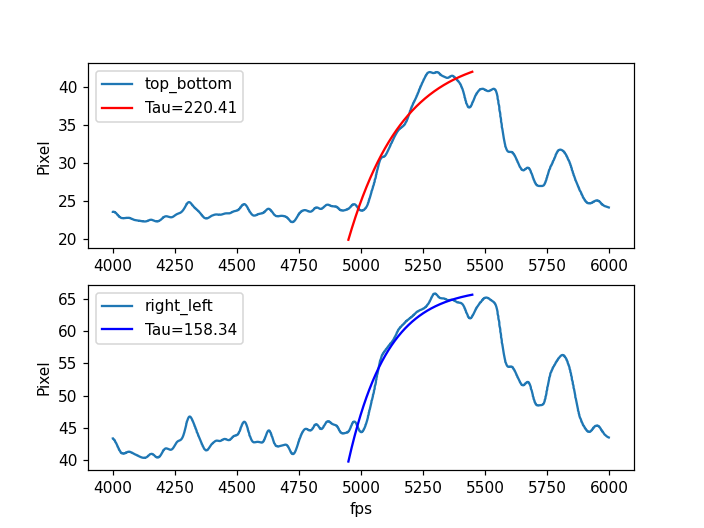

<IPython.core.display.Javascript object>


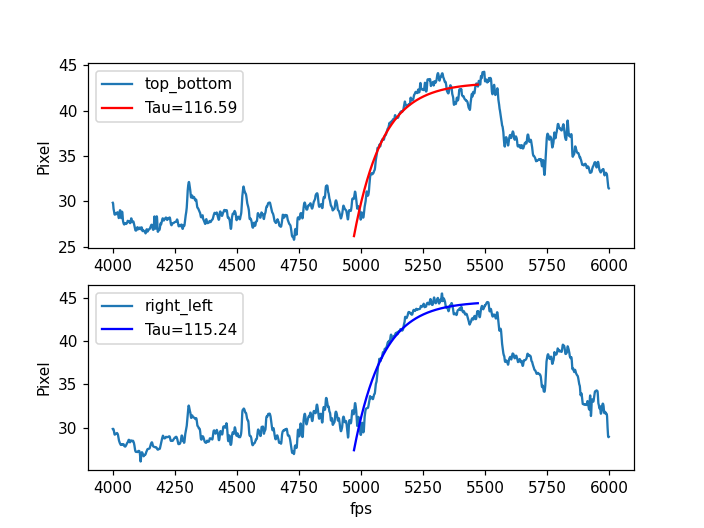

In [437]:
######################################################  Left Pupil
win = 10 # smoothing window
x_TD_Left_smoothed = smooth(x_TD_Left, win)
y_TD_Left_smoothed = smooth(y_TD_Left, win)
x_RL_Left_smoothed = smooth(x_RL_Left, win)
y_RL_Left_smoothed = smooth(y_RL_Left, win)

# Fitting window
start_fit = int(np.round(np.mean(infl_TB_Left))) # fit intial
end_fit = start_fit + 500 # fit end


x_fit_Left_TD= x_TD_Left_smoothed[start:end]
y_fit_Left_TD= y_TD_Left_smoothed[start:end]
x_fit_Left_RL= x_RL_Left_smoothed[start:end]
y_fit_Left_RL= y_RL_Left_smoothed[start:end]
# scale vector to start at zero otherwise exponent is too large
x_scale_Left_TD = x_fit_Left_TD[start_fit:end_fit] - x_fit_Left_TD[start_fit:end_fit][0]
x_scale_Left_RL = x_fit_Left_RL[start_fit:end_fit] - x_fit_Left_RL[start_fit:end_fit][0]
# initial guess for curve fit coefficients
# guess = [1, 1, 1]

fig, ax = plt.subplots(2)
ax[0].plot(x_TD_Left_smoothed[start:end], y_TD_Left_smoothed[start:end], label='top_bottom')
ax[1].plot(x_RL_Left_smoothed[start:end], y_RL_Left_smoothed[start:end], label='right_left')
popt_TD_Left, pcov_TD_Left = curve_fit(func_exp_1, x_scale_Left_TD,y_fit_Left_TD[start_fit:end_fit])
popt_RL_Left, pcov_RL_Left = curve_fit(func_exp_1, x_scale_Left_RL,y_fit_Left_RL[start_fit:end_fit])
ax[0].plot(x_fit_Left_TD[start_fit:end_fit], func_exp_1(x_scale_Left_TD, *popt_TD_Left), 'r-',
label='Tau=%5.2f' % (popt_TD_Left[1]))
ax[1].plot(x_fit_Left_RL[start_fit:end_fit], func_exp_1(x_scale_Left_RL, *popt_RL_Left), 'b-',
label='Tau=%5.2f' % (popt_RL_Left[1]))


ax[0].set_ylabel('Pixel') 
ax[1].set_ylabel('Pixel')
ax[1].set_xlabel('fps')
ax[0].legend()
ax[1].legend()

######################################################  Right Pupil
win = 1 # smoothing window
x_TD_Right_smoothed = smooth(x_TD_Right, win)
y_TD_Right_smoothed = smooth(y_TD_Right, win)
x_RL_Right_smoothed = smooth(x_RL_Right, win)
y_RL_Right_smoothed = smooth(y_RL_Right, win)

# Fitting window
start_fit = int(np.round(np.mean(infl_TB_Right))) # fit intial
end_fit = start_fit + 500 # fit end


x_fit_Right_TD= x_TD_Right_smoothed[start:end]
y_fit_Right_TD= y_TD_Right_smoothed[start:end]
x_fit_Right_RL= x_RL_Right_smoothed[start:end]
y_fit_Right_RL= y_RL_Right_smoothed[start:end]
# scale vector to start at zero otherwise exponent is too large
x_scale_Right_TD = x_fit_Right_TD[start_fit:end_fit] - x_fit_Right_TD[start_fit:end_fit][0]
x_scale_Right_RL = x_fit_Right_RL[start_fit:end_fit] - x_fit_Right_RL[start_fit:end_fit][0]
# initial guess for curve fit coefficients
# guess = [1, 1, 1]

fig, ax = plt.subplots(2)
ax[0].plot(x_TD_Right_smoothed[start:end], y_TD_Right_smoothed[start:end], label='top_bottom')
ax[1].plot(x_RL_Right_smoothed[start:end], y_RL_Right_smoothed[start:end], label='right_left')
popt_TD_Right, pcov_TD_Right = curve_fit(func_exp_1, x_scale_Right_TD,y_fit_Right_TD[start_fit:end_fit])
popt_RL_Right, pcov_RL_Right = curve_fit(func_exp_1, x_scale_Right_RL,y_fit_Right_RL[start_fit:end_fit])
ax[0].plot(x_fit_Right_TD[start_fit:end_fit], func_exp_1(x_scale_Right_TD, *popt_TD_Right), 'r-',
label='Tau=%5.2f' % (popt_TD_Right[1]))
ax[1].plot(x_fit_Right_RL[start_fit:end_fit], func_exp_1(x_scale_Right_RL, *popt_RL_Right), 'b-',
label='Tau=%5.2f' % (popt_RL_Right[1]))


ax[0].set_ylabel('Pixel') 
ax[1].set_ylabel('Pixel')
ax[1].set_xlabel('fps')
ax[0].legend()
ax[1].legend()